<a href="https://colab.research.google.com/github/Jessie-Willow/Generic-templates-for-lab-anal-JW/blob/main/Stirling_engine_part_3_(JW).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
#import some useful modules
import numpy as np
import pandas
from matplotlib import pyplot as plt
import scipy.constants as const
import scipy.optimize as optimize
import scipy.stats as stats
import scipy.odr as odr
from google.colab import drive
#titles and labels your plots and residuals
xtitle="inverse volume 1/m^3"
ytitle="Pressure (pascals)"
T=10
T_err=0.1
r=const.R
def ratio_error(a,a_err,b,b_err):
  val1=(a_err/b)**2
  val2=((a*b_err)/(b**2))**2
  return((val1+val2)**0.5)
#data
drive.mount('/content/gdrive')
alldata=pandas.read_csv("gdrive/My Drive/Stirling engine data - Sheet1.csv",header=[0], sep=",")
V=np.array(alldata["Voltage"])
P=np.array(alldata["Pressure"])
del_bef=np.arange(0,3,1)
del_aft=np.arange(7,10,1)
#assigns your data to arrays
V1=(V)
V1=np.delete(np.delete(V1,del_aft),del_bef)
V1_err=np.ones(len(V1))*0.1
P1=(P)
P1=np.delete(np.delete(P1,del_aft),del_bef)
P1_err=np.ones(len(V1))*0.01
x1=1/V1
x1_err=np.array(V1_err)/(V1**2)
y1=np.array(P1)
y1_err=np.array(P1_err)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [38]:

#assigns your data to arrays, and makes them a little random for the perfect fake data.
#make sure to remove the numpy random code before using this for actual data!
V2=(V)
V2=np.delete(np.delete(V2,del_aft),del_bef)
V2_err=np.ones(len(V2))*0.1
P2=(P)
P2=np.delete(np.delete(P2,del_aft),del_bef)
P2_err=np.ones(len(P2))*0.01
x2=1/V2
x2_err=np.array(V2_err)/(V2**2)
y2=np.array(P2)
y2_err=np.array(P2_err)

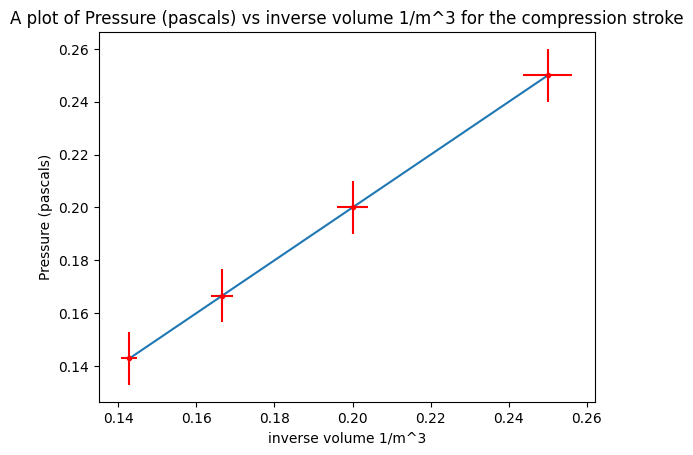

In [39]:
#defines a straight line function (used for residuals)
def straight_line(x, m, c):
    y = m * x + c
    return y


dof = len(x1) - 2
#performs a versing of Deming regression (very complicated dont ask)
mydata = odr.Data(x1, y1, wd=1/x1_err, we=1/y1_err)
myodr = odr.ODR(mydata, model=odr.unilinear)
myoutput = myodr.run()
m1,c1 = myoutput.beta
#assigns your fit paramaters to m,c and their errors.
y1_fit = straight_line(x1, m1, c1)
m1_err,c1_err=(myoutput.sd_beta)
#plotting!
plt.errorbar(x1, y1, yerr=y1_err, xerr=x1_err, fmt='r.')
plt.plot(x1, y1_fit, marker=None)
plt.ylabel(ytitle)
plt.xlabel(xtitle)
plt.title("A plot of "+ ytitle +" vs " +xtitle+ " for the compression stroke")
plt.show()

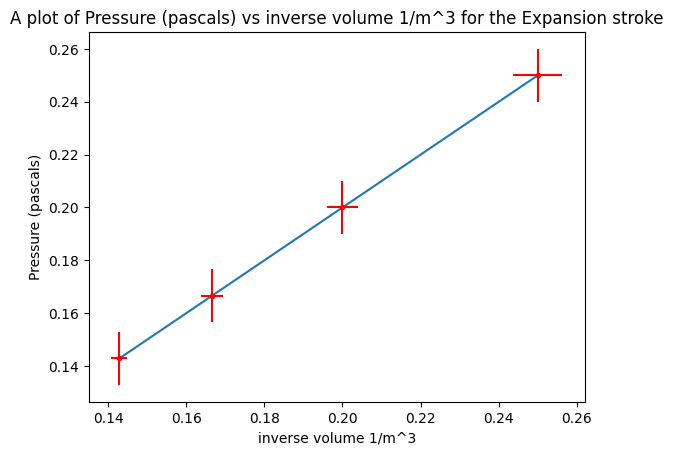

In [40]:
dof = len(x2) - 2
#performs a versing of Deming regression (very complicated dont ask)
mydata = odr.Data(x2, y2, wd=1/x2_err, we=1/y2_err)
myodr = odr.ODR(mydata, model=odr.unilinear)
myoutput = myodr.run()
m2,c2 = myoutput.beta
#assigns your fit paramaters to m,c and their errors.
y2_fit = straight_line(x2, m2, c2)
m2_err,c2_err=(myoutput.sd_beta)
#plotting!
plt.errorbar(x2, y2, yerr=y2_err, xerr=x2_err, fmt='r.')
plt.plot(x2, y2_fit, marker=None)
plt.ylabel(ytitle)
plt.xlabel(xtitle)
plt.title("A plot of "+ ytitle +" vs " +xtitle+ " for the Expansion stroke")
plt.show()

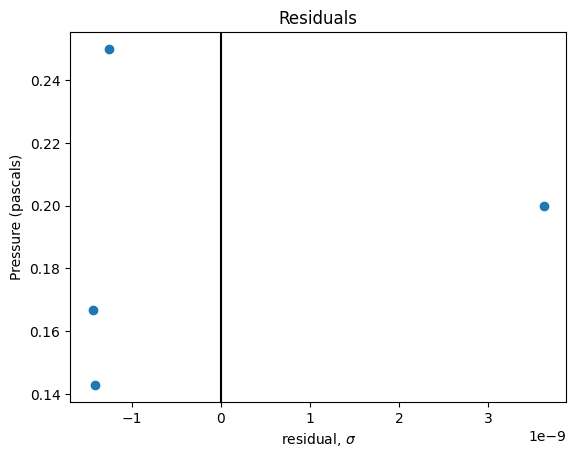

In [41]:
#defines the invserse linear funtion for the x residuals
def inversestr(y,m,c):
  return((y-c)/m)
x1_fit = inversestr(y1, m1, c1)
residuals1 = x1 - x1_fit
plt.scatter(residuals1/x1_err,y1)
plt.axvline(x=0, color='black')
plt.ylabel(ytitle)
plt.xlabel('residual, $\sigma$')
plt.title('Residuals')
plt.show()

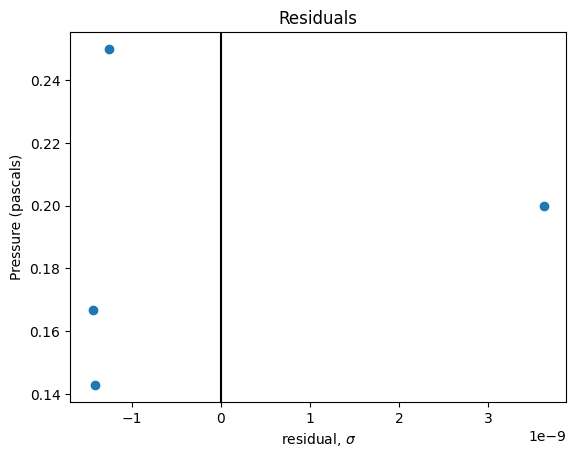

In [42]:
x2_fit = inversestr(y2, m2, c2)
residuals2 = x2 - x2_fit
plt.scatter(residuals2/x2_err,y2)
plt.axvline(x=0, color='black')
plt.ylabel(ytitle)
plt.xlabel('residual, $\sigma$')
plt.title('Residuals')
plt.show()

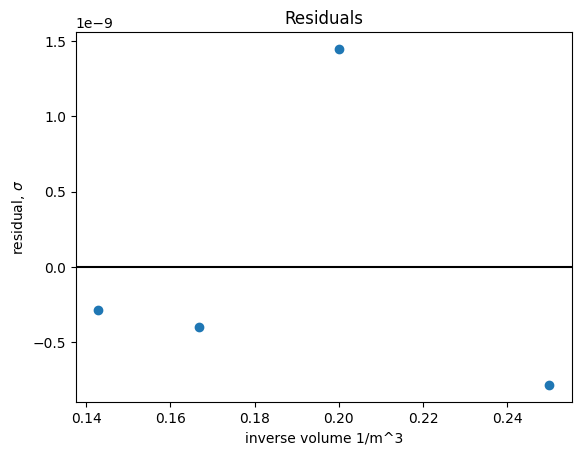

In [43]:
#uses the nroaml straight line for the y residuals
y1fit=straight_line(x1,m1,c1)
residuals2 = y1 - y1fit
chi_squarey1 = np.sum(residuals2**2/y1_err**2)
plt.scatter(x1, residuals1/y1_err)
plt.axhline(y=0, color='black')
plt.ylabel('residual, $\sigma$')
plt.xlabel(xtitle)
plt.title('Residuals')
plt.show()

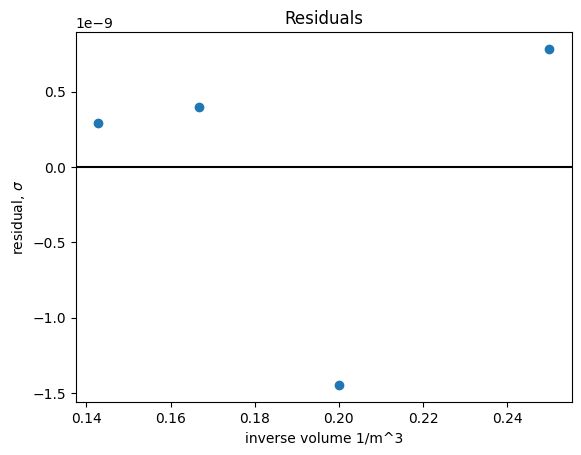

In [44]:
y2fit=straight_line(x2,m2,c2)
residuals2 = y2 - y2fit
chi_squarey2 = np.sum(residuals2**2/y2_err**2)
plt.scatter(x2, residuals2/y2_err)
plt.axhline(y=0, color='black')
plt.ylabel('residual, $\sigma$')
plt.xlabel(xtitle)
plt.title('Residuals')
plt.show()

In [45]:
#prints the plot values and errors
print('The obtained value for the gradient m is:\n')
print(f'{m1:.3} +/- {m1_err:.2} units')
print('\nThe obtained value for the y-intercept c is:\n')
print(f'{c1:.3} +/- {c1_err:.2} units')
n=m1/(r*T)
n_err=ratio_error(m1,m1_err,T,T_err)/r
print(f"therefore the calculated value of n is {n} +/- {n_err}")
#prints the fit analysis including chi squared and p value
#chi sqaured is divided by two due to the errors on x and y being accounted for in the fit. this has been shown experimentall to produce the correct p values
print(f'The fit yielded \nchi2 = {chi_squarey1:.3} with {dof} degrees of freedom')
print(f'giving a reduced chi2 of {chi_squarey1/(dof*2):.3} for y')
chi2 = stats.chi2
p_valuey1 = chi2.sf(chi_squarey1/2, dof)
print(f'P-value(y) = {p_valuey1:.2}')

The obtained value for the gradient m is:

1.0 +/- 2.6e-11 units

The obtained value for the y-intercept c is:

1.04e-10 +/- 0.0 units
therefore the calculated value of n is 0.012027235499128148 +/- 0.00012027235499128148
The fit yielded 
chi2 = 2.95e-18 with 2 degrees of freedom
giving a reduced chi2 of 7.38e-19 for y
P-value(y) = 1.0


In [46]:
#prints the plot values and errors
print('The obtained value for the gradient m is:\n')
print(f'{m1:.3} +/- {m1_err:.2} units')
print('\nThe obtained value for the y-intercept c is:\n')
print(f'{c1:.3} +/- {c1_err:.2} units')
print(f"therefore the calculated value of T2 is {m2/(r*n)} +/- {ratio_error(m2,m2_err,n,n_err)/r}")
#prints the fit analysis including chi squared and p value
#chi sqaured is divided by two due to the errors on x and y being accounted for in the fit. this has been shown experimentall to produce the correct p values
print(f'The fit yielded \nchi2 = {chi_squarey1:.3} with {dof} degrees of freedom')
print(f'giving a reduced chi2 of {chi_squarey1/(dof*2):.3} for y')
chi2 = stats.chi2
p_valuey1 = chi2.sf(chi_squarey1/2, dof)
print(f'P-value(y) = {p_valuey1:.2}')

The obtained value for the gradient m is:

1.0 +/- 2.6e-11 units

The obtained value for the y-intercept c is:

1.04e-10 +/- 0.0 units
therefore the calculated value of T2 is 10.0 +/- 0.1
The fit yielded 
chi2 = 2.95e-18 with 2 degrees of freedom
giving a reduced chi2 of 7.38e-19 for y
P-value(y) = 1.0
